In [160]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as plt 
import matplotlib.pyplot as plt  
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error

In [33]:
dataset = load_diabetes()

In [43]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [45]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [51]:
df = pd.DataFrame(dataset.data,columns=['age',
  'sex',
  'bmi',
  'bp',
  's1',
  's2',
  's3',
  's4',
  's5',
  's6'])

In [55]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [69]:

X= df#independent
Y = dataset['target']#dependent

In [67]:
#train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.3,random_state=10)

In [71]:
X_train .corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

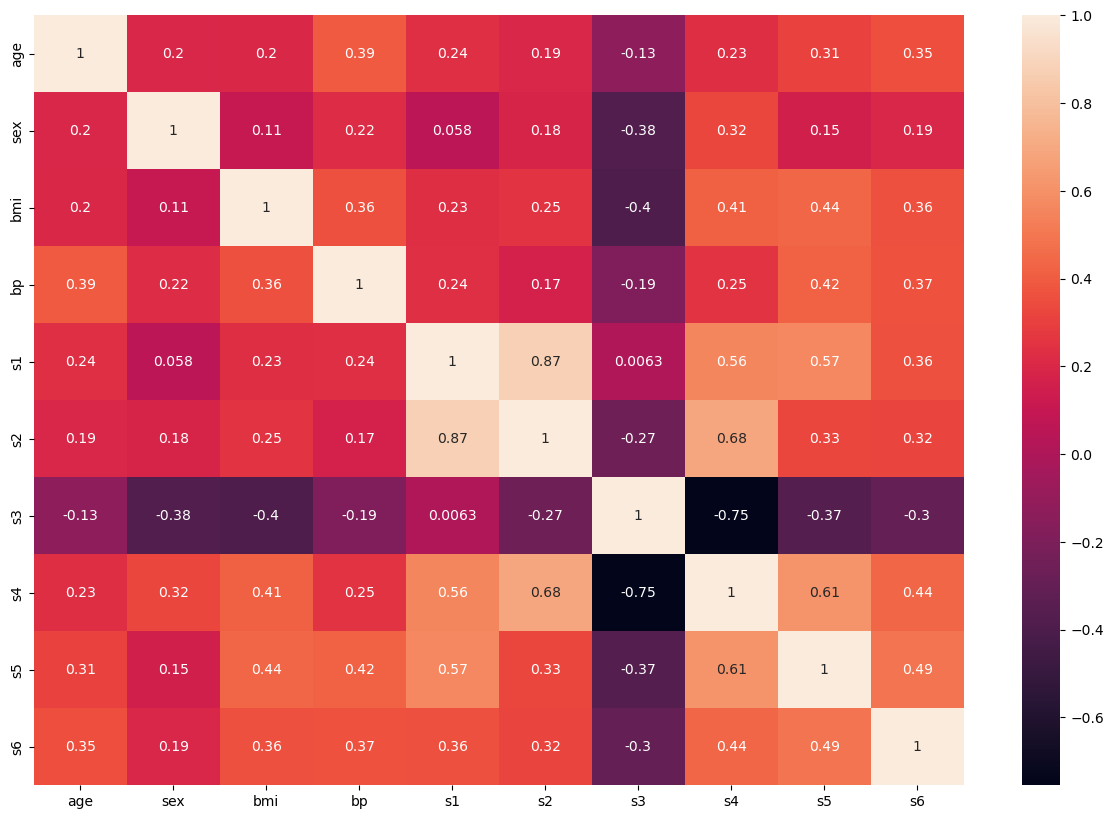

In [73]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [85]:
model = DecisionTreeRegressor()
model.fit(X_train,Y_train)

DecisionTreeRegressor()

#hyperparameter Tunning 

In [100]:
 param ={
     'criterion': ['squared_error','freedom_mse','absolute_error'],
     'splitter': ['best','ramdom'],
     'max_depth' :[1,2,3,4,5,10,15,20,25],
     'max_features': ['auto','sqrt','log2'] 
 }
# param = {
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'splitter': ['best', 'random'],
#     'max_depth': [1, 2, 3, 4, 5],
#     'max_features': ['auto', 'sqrt', 'log2']
# }


In [102]:
param

{'criterion': ['squared_error', 'freedom_mse', 'absolute_error'],
 'splitter': ['best', 'ramdom'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [104]:
grid= GridSearchCV(model,param_grid=param,cv=5,scoring = 'neg_mean_squared_error')

In [106]:
import warnings 
warnings.filterwarnings('ignore')
grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'freedom_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'ramdom']},
             scoring='neg_mean_squared_error')

In [110]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [112]:
#preditoions
Y_pred = grid.predict(X_test)

In [118]:
print(r2_score(Y_test,Y_pred))
print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))

0.3316822626099307
50.67454579329448
4228.894829179532


In [140]:
#now i am making a new model with best params to make it more accurate

In [122]:
 params ={
     'criterion': ['squared_error'],
     'splitter': ['best'],
     'max_depth' :[4],
     'max_features': ['sqrt'] 
 }

In [132]:
grid2= GridSearchCV(model,param_grid=params,cv=5,scoring = 'neg_mean_squared_error')

In [134]:
import warnings 
warnings.filterwarnings('ignore')
grid2.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'], 'max_depth': [4],
                         'max_features': ['sqrt'], 'splitter': ['best']},
             scoring='neg_mean_squared_error')

In [136]:
#preditoions
Y_pred = grid2.predict(X_test)

In [138]:
print(r2_score(Y_test,Y_pred))
print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))

0.241686374490798
55.72998054622338
4798.359209102595


In [142]:
#visualize the decision tree

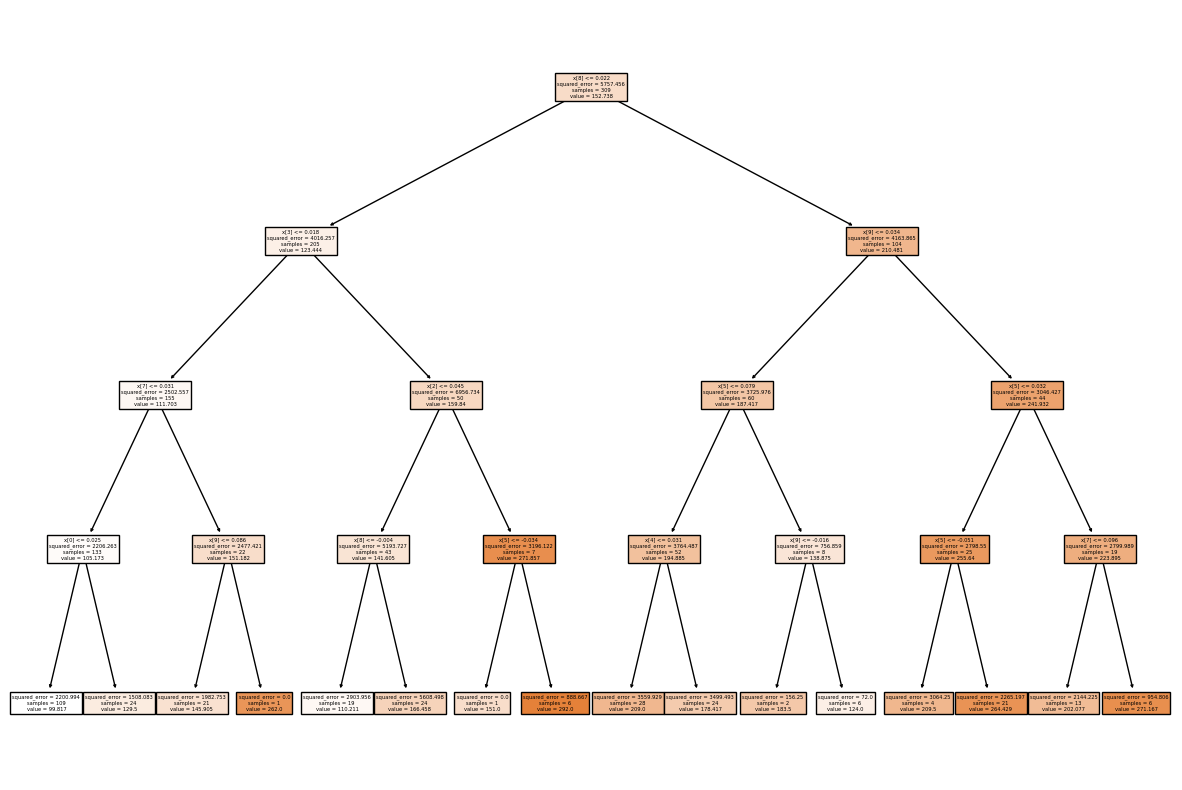

In [158]:

best_model = grid2.best_estimator_
plt.figure(figsize=(15, 10))
tree.plot_tree(best_model, filled=True)
plt.show()